In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR

## Random series

In [2]:
s1 = np.random.normal(0, 1, 100)
s2 = np.random.normal(0, 1, 100)

In [3]:
df = pd.DataFrame({'s1': s1, 's2': s2})

<Axes: >

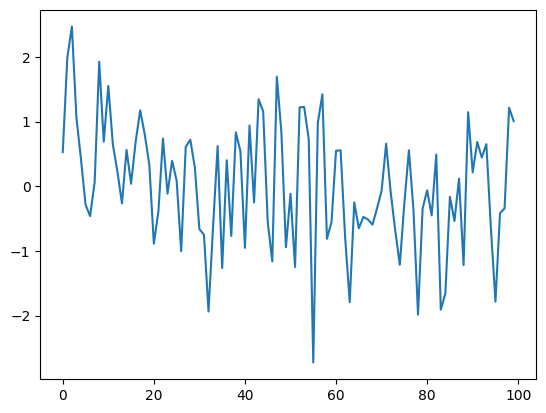

In [6]:
pd.Series(s1).plot()

In [7]:
var = VAR(df)

In [8]:
res = var.fit(maxlags=30)

In [9]:
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Apr, 2025
Time:                     23:23:14
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    2.36068
Nobs:                     70.0000    HQIC:               -0.00152856
Log likelihood:          -22.1170    FPE:                    1.36630
AIC:                     -1.55813    Det(Omega_mle):        0.390121
--------------------------------------------------------------------
Results for equation s1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         -0.467579         0.325758           -1.435           0.151
L1.s1         -0.046203         0.326067           -0.142           0.887
L1.s2          0.203545         0.324431            0.627           0.530
L2.s1         -0.

In [10]:
df_pred = res.forecast(df.values, 10)

<Axes: >

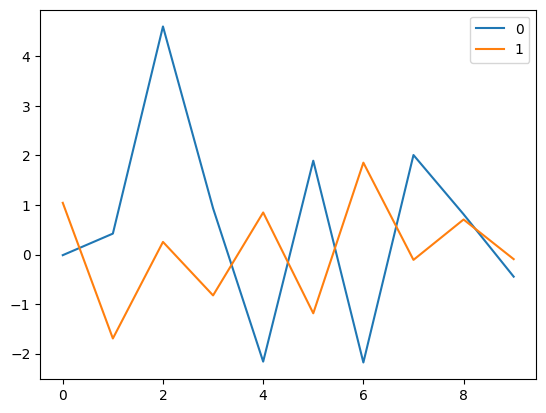

In [11]:
pd.DataFrame(df_pred).plot()

## Not random series

In [14]:
df = pd.read_csv('../data/stability_index.csv')

<Axes: >

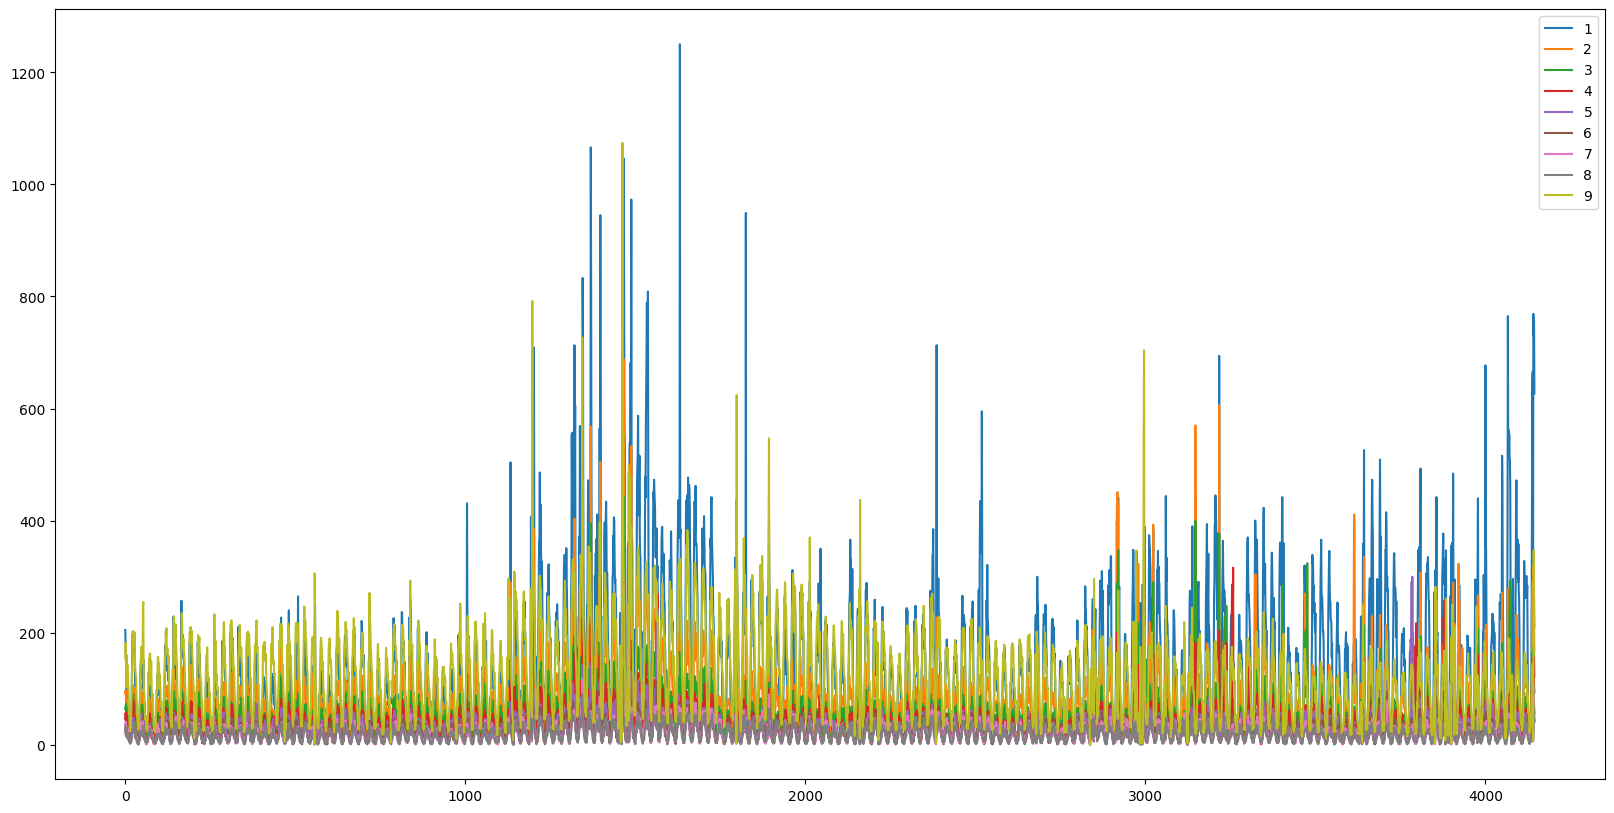

In [15]:
df.plot(figsize=(20, 10))

In [16]:
df = df[['3', '2']]

<Axes: >

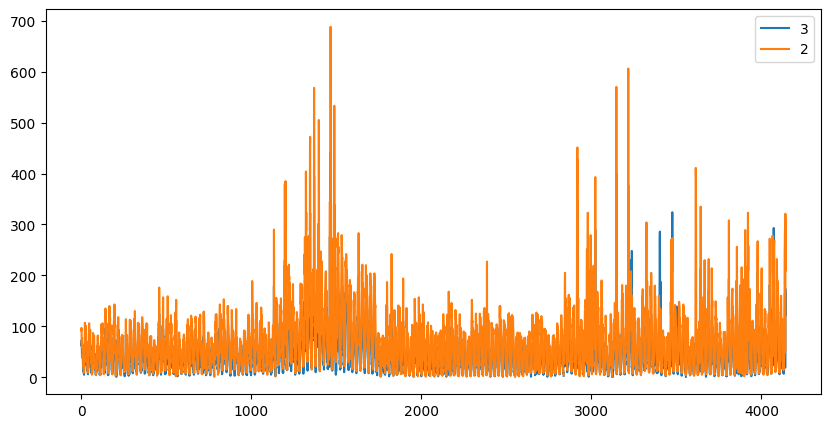

In [17]:
df.plot(figsize=(10, 5))

In [18]:
df.fillna(0, axis=0, inplace=True)

/var/folders/xk/304zh5617yn50x0ys84shn5m0000gn/T/ipykernel_51850/1496159409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, axis=0, inplace=True)


In [19]:
var = VAR(df)

In [20]:
res = var.fit()

In [21]:
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 23, Apr, 2025
Time:                     23:25:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    12.6549
Nobs:                     4144.00    HQIC:                   12.6489
Log likelihood:          -37956.0    FPE:                    310423.
AIC:                      12.6457    Det(Omega_mle):         309974.
--------------------------------------------------------------------
Results for equation 3
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        10.726788         0.639865           16.764           0.000
L1.3          0.475652         0.026454           17.980           0.000
L1.2          0.195957         0.017492           11.203           0.000

Results for equation 2

<Axes: >

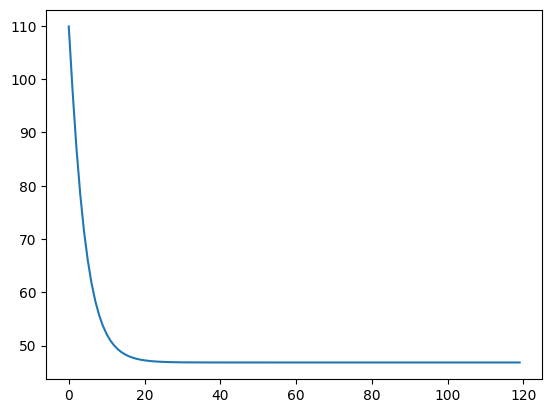

In [27]:
pd.Series(res.forecast(df.values, 120)[:, 0]).plot()